In [29]:
"aTSndard"[2::-1]

'STa'

## Seaborn

![seaborn](https://drive.google.com/uc?id=1j1ZM-tMaWYNCa_YkMGFIfymcrLS0MWG3)


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, barplot, jointplot, lineplot, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [2]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
from seaborn import load_dataset

data = load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

- **수치형 데이터(연속형)의 대략적인 분포를 확인할 때** (이산형 X)

(45.0, 60.0)

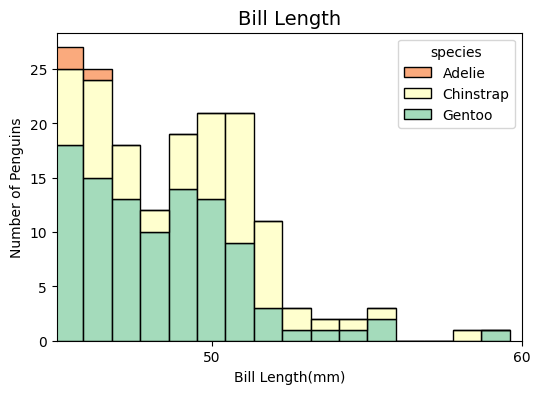

In [3]:
# penguin 데이터에 histplot을 출력합니다.
# bins=30 은 30개의 막대기를 그리겠다. 즉, 30구간으로 자르겠다.
# hue='species' 종별로 색상을 다르게 주겠다. -> 이렇게 되면 막대가 겹쳐지는 문제도 발생
# multiple = 'stack'으로 하면 막대가 안 겹치고 쌓여져서 그려짐.
## color palette name : Blues(단일 색상) 
## Set2[파스텔톤 8개](discrete)서로 색상이 비교적 다른 편, 팔레트 개수가 한정돼 있음.
## viridis[초록 보라 계열], Spectral[빛 색 계열](continuous) 연속적으로 색상을 표현. 
## 하지만 소수의 데이터를 구분하기는 어렵
import matplotlib.pyplot as plt

# figsize=(a, b) 에서 a는 가로 길이, b는 세로 길이를 의미함.
# plt같은 경우 seaborn 코드 다음에 써 주는 편이 나음. seaborn이 plt에 덮어씌워지기 때문.

plt.figure(figsize=(6, 4))
plt.title("Bill Length", fontsize=14, loc='center')
sns.histplot(data=data, x='bill_length_mm',
            bins=30, hue='species',
            multiple='stack',
            palette='Spectral')
plt.xlabel('Bill Length(mm)')
plt.ylabel('Number of Penguins')

# tick은 눈금 말하는 것. 아래처럼 리스트로 작성하는 것도 가능하고
# plt.xticks([0, 10, 20, 30, 40, 50, 60])
# 아래처럼 코드로 구현할 수도 있음.

# 아래처럼 작성하면 그리고 싶은 부분도 조절할 수 있음.
plt.xticks([n*10 for n in range(7)])
plt.xlim(45, 60)

### Displot 

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, hist(histogram)plot, kde(kenerl density estimation)plot(연속히스토그램), ecdfplot(누적분포함수) 모두 출력이 가능합니다.

e.g. displot(kind="hist")

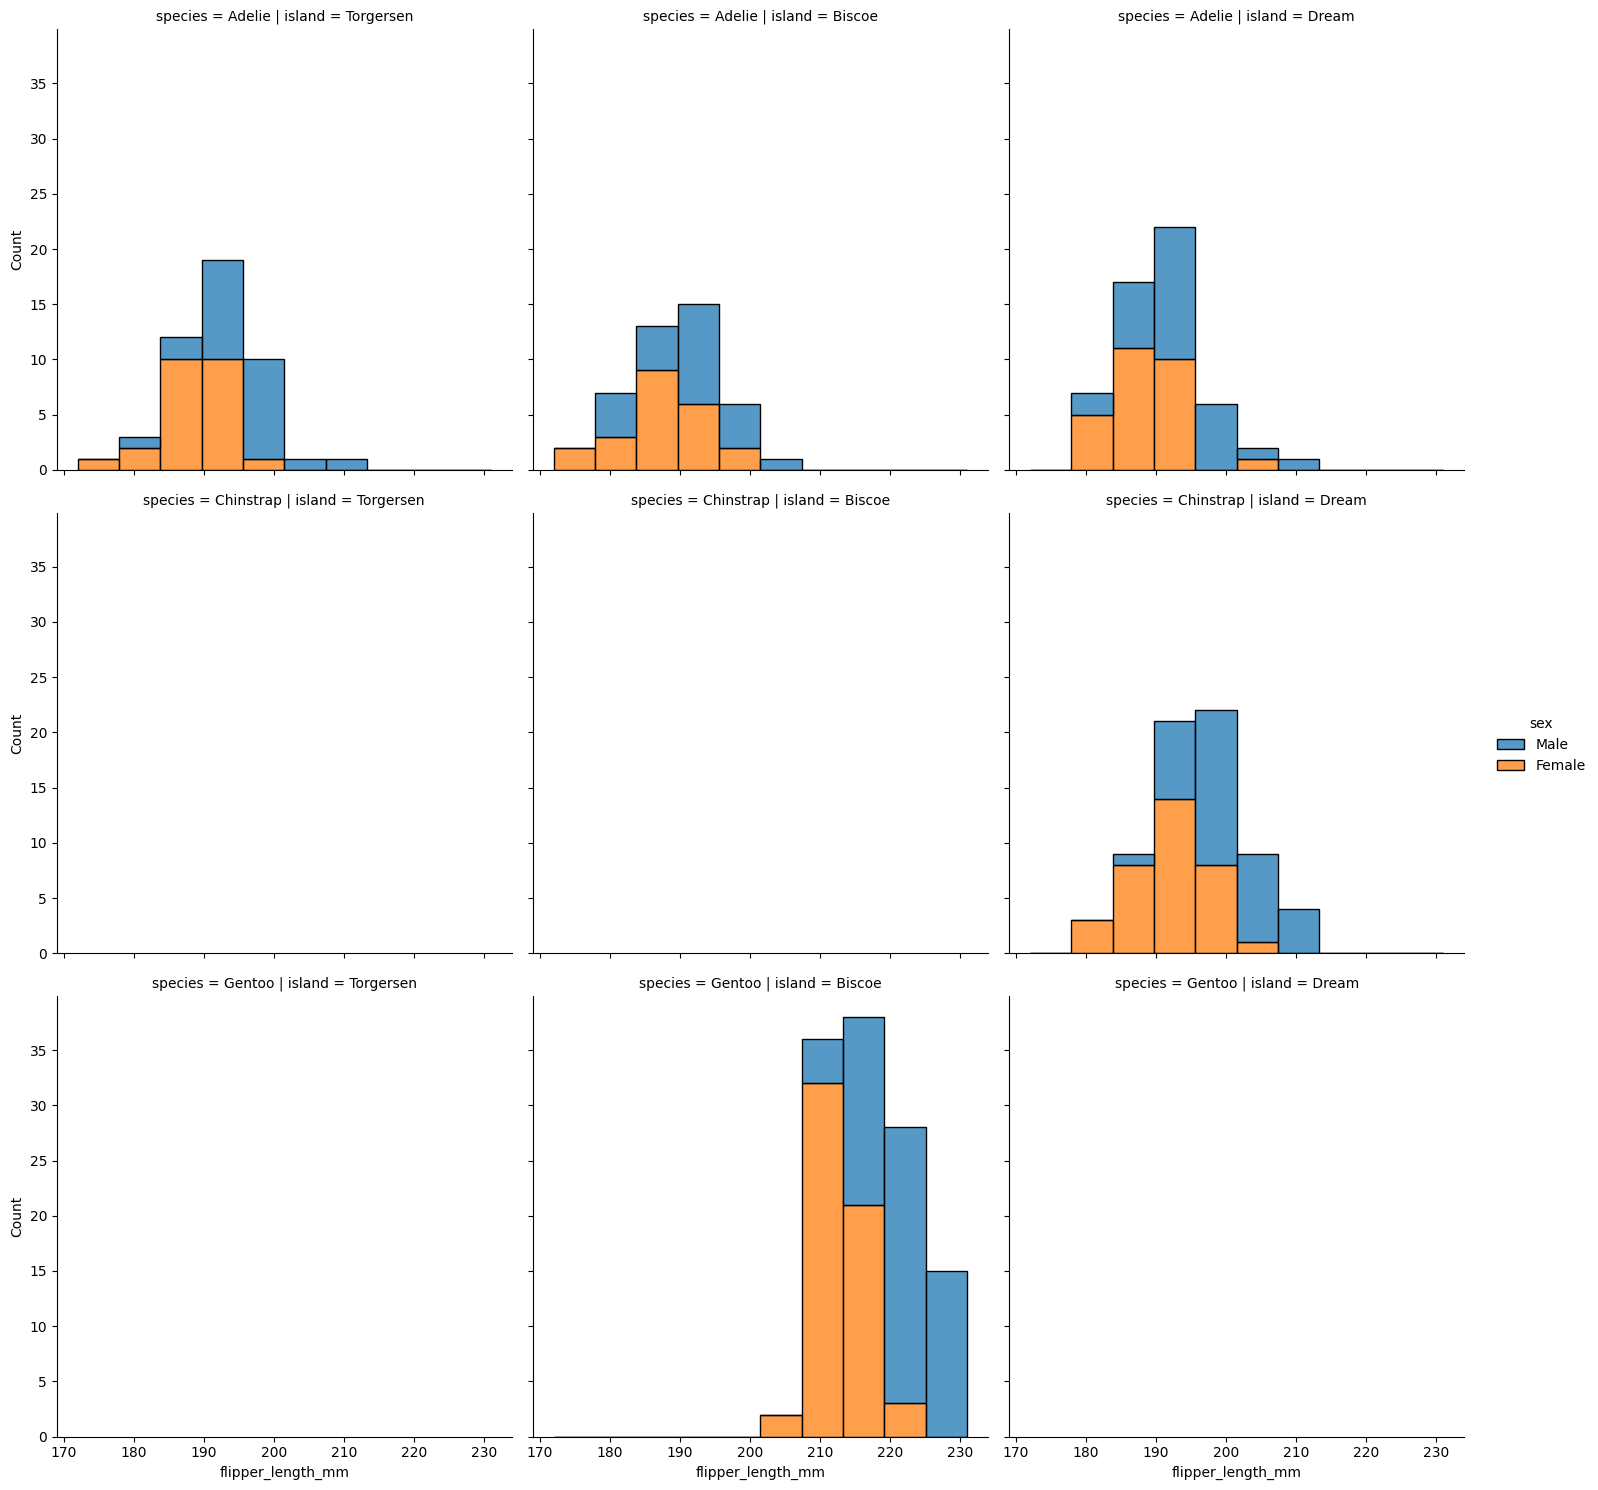

In [20]:
# penguin 데이터에 displot을 출력합니다.
# kind는 그래프의 종류(히스토그램이냐, kde냐, 누적분포함수냐)
# col은 열을 무엇을 기준으로 비교할 것이냐 / row는 행을 무엇을 기준으로 비교할 것이냐
# 여기서 hue까지 새로운 기준을 더해주면 총 3차원 비교가 가능해지는 것. but 가독성이 굉장히 좋음.
# multiple='stack'을 사용하면 색깔을 쌓아 줌. 

sns.displot(data=data, x="flipper_length_mm", kind='hist', col='island', row='species', hue='sex', multiple='stack')

### Barplot

- 보통 연속형 데이터의 평균을 카테고리별로 비교하기 위해 사용함.


- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<Axes: xlabel='species', ylabel='body_mass_g'>

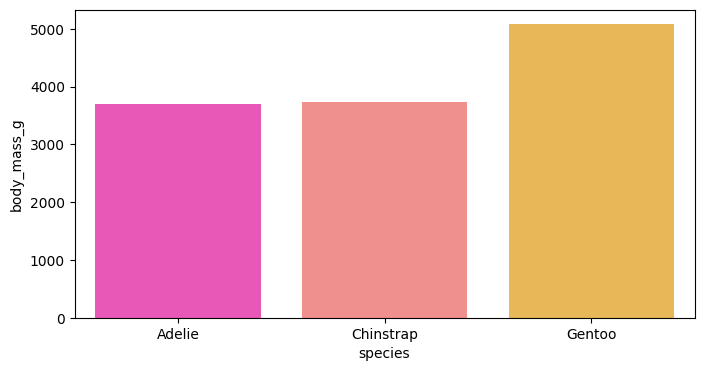

In [27]:
# penguin 데이터에 barplot을 출력합니다.

# x축과 y축을 무엇으로 설정하냐에 따라서 가로로도 세로로도 출력 가능하니, 가독성을 높이는 방향으로 설계

plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='species', y='body_mass_g', errorbar=None, hue='species', palette='spring')

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='species', ylabel='count'>

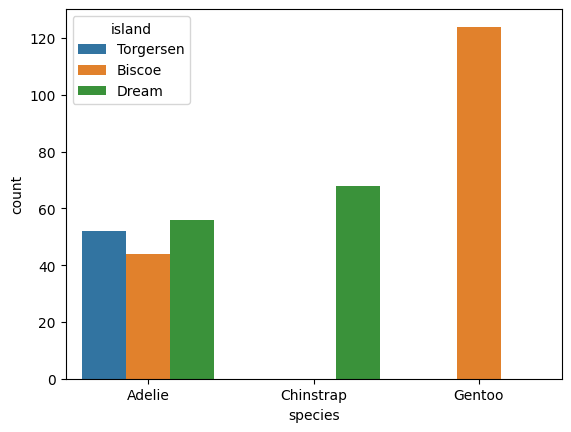

In [32]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=data, x='species', hue='island')

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quartile Range)


- IQR = Q3(제3사분위수) - Q1(제1사분위수)


- 이상치 범위
Q3 + 1.5 * IQR > 이상치 > Q1 - 1.5 * IQR

<Axes: xlabel='species', ylabel='body_mass_g'>

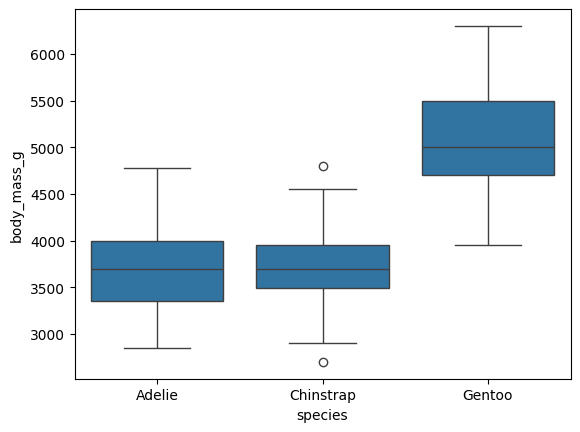

In [33]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=data, x='species', y='body_mass_g')
# What is boxplot?
## 상자는 제3사분위수와 제1사분위수를 나타냄. 즉 상위 75%와 상위 25%.
### 수염은 최대값과 최소값
#### 동그라미가 이상치.


### Violinplot 

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(violinplot) 모두 확인이 가능합니다.

In [ ]:
# penguin 데이터에 violinplot을 출력합니다.


### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<Axes: xlabel='id', ylabel='body_mass_g'>

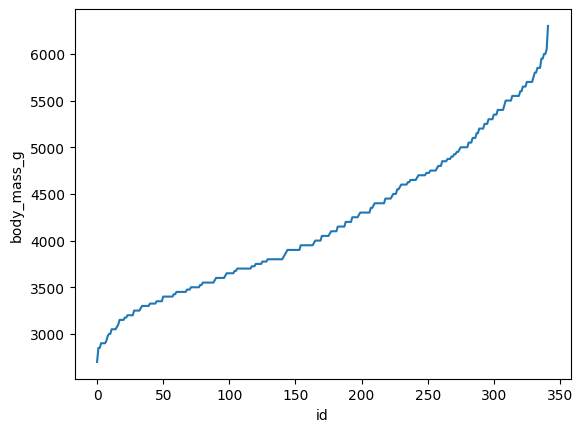

In [37]:
# penguin 데이터에 lineplot을 출력합니다.
import numpy as np

temp = data.sort_values(by='body_mass_g') 
temp['id'] = np.arange(len(temp))
sns.lineplot(data=temp, x='id', y='body_mass_g')

sns.lineplot(x=data.index, y=data.body_mass_g)

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

In [ ]:
# penguin 데이터에 pointplot을 출력합니다.


### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

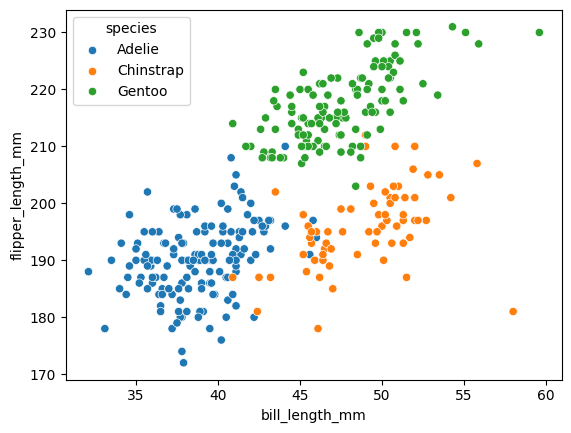

In [38]:
# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=data, x='bill_length_mm', y='flipper_length_mm', hue='species')

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

In [ ]:
# penguin 데이터에 pairplot을 출력합니다.
sns.pairplot(data=data, hue='species')

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [39]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = data.corr(numeric_only=True)

<Axes: >

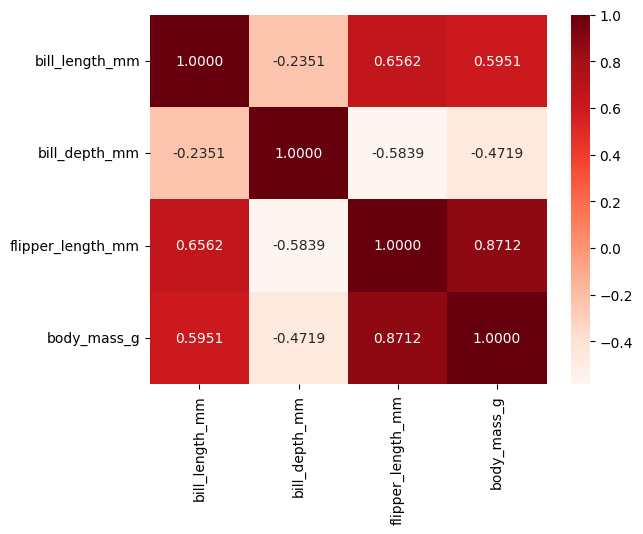

In [42]:
# penguin 데이터에 heatmap을 출력합니다.
sns.heatmap(data=corr, annot=True, fmt='.4f', cmap='Reds')